# Project 4 - Client Problem #1: 
# Leveraging Social Media to Map Disasters
# Exploratory Data Analysis

## This follows on from the data collection phase, and combines the tweet data from Mexico Beach and Panama City.

In [73]:
import json
import pandas as pd
from pprint import pprint
import datetime

import numpy as np

import matplotlib.pyplot as plt

### Read in the two json files created during the data collection phase

In [37]:
df_mexico_beach = pd.read_json('tweets_df_mexico_beach_20mi_oct_date_string.json')
df_mexico_beach.info() # Int64Index: 682 entries, 0 to 99

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 99
Data columns (total 3 columns):
date_utc     682 non-null object
full_text    682 non-null object
long_lat     682 non-null object
dtypes: object(3)
memory usage: 21.3+ KB


In [42]:
df_mexico_beach.head()

,date_utc,full_text,long_lat
0,Wed Oct 17 23:21:55 +0000 2018,current weather in Panama City: scattered clou...,"[-85.66, 30.16]"
1,Wed Oct 17 23:10:52 +0000 2018,A resident from #MexicoBeach finds her marriag...,"[-85.40839, 29.94124]"
10,Wed Oct 17 20:37:55 +0000 2018,My new friend Mr. Harmon of Mexico Beach...a f...,"[-85.40839, 29.94124]"
100,Mon Oct 15 23:18:45 +0000 2018,Panama City: 6:10pm: sunset,"[-85.66, 30.16]"
101,Mon Oct 15 22:30:43 +0000 2018,"Katy Pinson comforted Brenda Pulliam, whose ho...","[-85.60471, 30.13108]"


In [39]:
df_panama_city = pd.read_json('tweets_df_panama_city_25mi_oct.json')
df_panama_city.info() # RangeIndex: 1352 entries, 0 to 1351

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 3 columns):
date_utc     1352 non-null object
full_text    1352 non-null object
long_lat     1352 non-null object
dtypes: object(3)
memory usage: 31.8+ KB


In [43]:
df_panama_city.head()

,date_utc,full_text,long_lat
0,Wed Oct 17 23:41:11 +0000 2018,Just posted a photo @ The Arc of The Bay / St....,"[-85.6585, 30.2312]"
1,Wed Oct 17 23:21:55 +0000 2018,current weather in Panama City: scattered clou...,"[-85.66, 30.16]"
2,Wed Oct 17 23:15:10 +0000 2018,🧜🏼‍♀️ #fallbreak2018 @ 30A-- Seagrove Beach ht...,"[-86.09041268, 30.30601299]"
3,Wed Oct 17 23:13:43 +0000 2018,"As some of you know,I lived in Panama City Bea...","[-85.8515, 30.2074]"
4,Wed Oct 17 23:10:52 +0000 2018,A resident from #MexicoBeach finds her marriag...,"[-85.40839, 29.94124]"


### Merge the Mexico Beach and Panama City datasets, before looking for duplicates

In [113]:
#df = pd.concat([df_mexico_beach, df_panama_city]) # 2034 rows × 3 columns

In [50]:
#df.to_json('tweets_df_panama_city_mexico_beach_oct.json', orient='records')

In [51]:
df.head()

,date_utc,full_text,long_lat
0,Wed Oct 17 23:21:55 +0000 2018,current weather in Panama City: scattered clou...,"[-85.66, 30.16]"
1,Wed Oct 17 23:10:52 +0000 2018,A resident from #MexicoBeach finds her marriag...,"[-85.40839, 29.94124]"
10,Wed Oct 17 20:37:55 +0000 2018,My new friend Mr. Harmon of Mexico Beach...a f...,"[-85.40839, 29.94124]"
100,Mon Oct 15 23:18:45 +0000 2018,Panama City: 6:10pm: sunset,"[-85.66, 30.16]"
101,Mon Oct 15 22:30:43 +0000 2018,"Katy Pinson comforted Brenda Pulliam, whose ho...","[-85.60471, 30.13108]"


### Drop the longitude / latitude column as it will not be used i.e. it will all be considered as one location for the purposes of modelling.

In [52]:
df.drop('long_lat', axis=1, inplace=True)
df.head()

,date_utc,full_text
0,Wed Oct 17 23:21:55 +0000 2018,current weather in Panama City: scattered clou...
1,Wed Oct 17 23:10:52 +0000 2018,A resident from #MexicoBeach finds her marriag...
10,Wed Oct 17 20:37:55 +0000 2018,My new friend Mr. Harmon of Mexico Beach...a f...
100,Mon Oct 15 23:18:45 +0000 2018,Panama City: 6:10pm: sunset
101,Mon Oct 15 22:30:43 +0000 2018,"Katy Pinson comforted Brenda Pulliam, whose ho..."


### Create function to convert the strings representing dates to actual date time objects, to allow time series modelling.

In [24]:
def convert_tweet_time_to_date(date_time_string):
    return datetime.datetime.strptime(date_time_string, "%a %b %d %H:%M:%S %z %Y") 

# test_first_date = df.date_utc[0]
# type(test_first_date)
# convert_tweet_time_to_date(test_first_date)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 1351
Data columns (total 2 columns):
date_utc     2034 non-null object
full_text    2034 non-null object
dtypes: object(2)
memory usage: 87.7+ KB


### Convert the date column in the dataframe from string to type date time.

In [54]:
df.date_utc = df.date_utc.apply(convert_tweet_time_to_date)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2034 entries, 0 to 1351
Data columns (total 2 columns):
date_utc     2034 non-null datetime64[ns, UTC]
full_text    2034 non-null object
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 87.7+ KB


In [56]:
df.head()

,date_utc,full_text
0,2018-10-17 23:21:55+00:00,current weather in Panama City: scattered clou...
1,2018-10-17 23:10:52+00:00,A resident from #MexicoBeach finds her marriag...
10,2018-10-17 20:37:55+00:00,My new friend Mr. Harmon of Mexico Beach...a f...
100,2018-10-15 23:18:45+00:00,Panama City: 6:10pm: sunset
101,2018-10-15 22:30:43+00:00,"Katy Pinson comforted Brenda Pulliam, whose ho..."


### Set the date column to be the index, so it can be used for time series modelling

In [57]:
df.set_index('date_utc', inplace=True)

In [119]:
df # date is the index but is not sorted, which is ok.
df.head()
df.info() # DatetimeIndex: 2034 entries

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2034 entries, 2018-10-17 23:21:55+00:00 to 2018-10-01 00:06:08+00:00
Data columns (total 1 columns):
full_text    2034 non-null object
dtypes: object(1)
memory usage: 31.8+ KB


### Drop duplicates which resulted from the overlap between the 20 mile data collection radius around Mexico Beach and the 25 mile radius around Panama City i.e. they are only 25 miles apart.

In [160]:
#df.drop_duplicates(inplace=True) # 1403 rows × 1 columns
df.head()
#df.to_json('tweets_df_hurricane_michael_oct.json', orient='records') # saves text only
df.shape # (1403, 1)

(1403, 1)

### Get the number of tweets per hour

In [121]:
#df.resample('M').count() # 2018-10-31 00:00:00+00:00	682	682
#df.resample('d').count() # by days
#plt.plot(df.resample('d').count())
df_hourly_count = df.resample('h').count() 
# 408 rows × 1 columns = Panama City and Mexico Beach
# Was 408 rows × 1 columns = just Mexico Beach


In [122]:
df_hourly_count.full_text == 0 # Length: 408
sum(df_hourly_count.full_text == 0) # 67 
# => There appear to be 67 hours (observations) with no tweets
# Which wouldn't be surpising giving night time hours etc


67

In [123]:
#df.reset_index()
df.shape # (1403, 1)

(1403, 1)

In [182]:
df.head()

,full_text
date_utc,
2018-10-17 23:21:55+00:00,current weather in Panama City: scattered clou...
2018-10-17 23:10:52+00:00,A resident from #MexicoBeach finds her marriag...
2018-10-17 20:37:55+00:00,My new friend Mr. Harmon of Mexico Beach...a f...
2018-10-15 23:18:45+00:00,Panama City: 6:10pm: sunset
2018-10-15 22:30:43+00:00,"Katy Pinson comforted Brenda Pulliam, whose ho..."


#### Plot the number of tweets per hour in the week before and after Hurricane Michael landfall at Mexico Beach, Florida

In [176]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xX-large'}
#          'xtick.labelsize':'x-large',
#          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

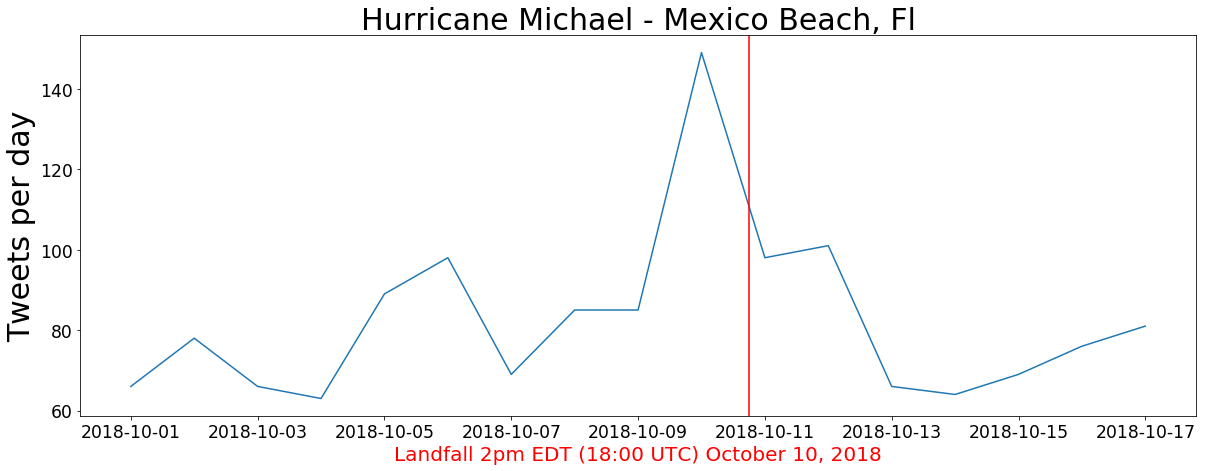

In [188]:
fig, ax = plt.subplots(figsize=(20,7))

ax.set_title('Hurricane Michael - Mexico Beach, Fl',
            fontsize=30)

ax.set_ylabel('Tweets per day',
             fontsize=30)
ax.set_xlabel('Landfall 2pm EDT (18:00 UTC) October 10, 2018',
             fontsize=20, color='r')

ax.plot(df.resample('d').count())
plt.axvline(x='2018-10-10 18:00:00', color='r')

### Do some exploratory data analysis of the tweet text. Test aggregating all the tweet text by hour. 

In [125]:
type(df.resample('h').agg({'full_text':np.sum}))
# pandas.core.frame.DataFrame
df.resample('h').agg({'full_text':np.sum}).iloc[0]['full_text']

"Sorry fellas, she’s unaVEILable! #HechtYeaIDo #joiningjordan\n\n👰🏽\nShop my look by clicking this link —&gt; https://t.co/JKFHxk2xOQ \nOr screenshot to shop on the https://t.co/lgaMntMElS app! #liketkit… https://t.co/MLeLYTc1lTThese two did it ALL this weekend at the beach. #Brothers @ Shell Island White Sand Beach https://t.co/FtMa1krCAo🍍🍍🍍🍍🍍🍍 @ Pineapple Willy's Restaurant https://t.co/pZILxSXKLj"

In [134]:
df.resample('h').agg({'full_text':' ~|~ '.join})
df.resample('h').agg({'full_text':' ~|~ '.join}).iloc[0]['full_text']

"Sorry fellas, she’s unaVEILable! #HechtYeaIDo #joiningjordan\n\n👰🏽\nShop my look by clicking this link —&gt; https://t.co/JKFHxk2xOQ \nOr screenshot to shop on the https://t.co/lgaMntMElS app! #liketkit… https://t.co/MLeLYTc1lT ~|~ These two did it ALL this weekend at the beach. #Brothers @ Shell Island White Sand Beach https://t.co/FtMa1krCAo ~|~ 🍍🍍🍍🍍🍍🍍 @ Pineapple Willy's Restaurant https://t.co/pZILxSXKLj"

In [135]:
df.resample('h').agg({'full_text':' ~|~ '.join}).iloc[1]['full_text']

'Happy birthday to my little princess!!!  Love you ❤️ #BirthdayTrip #ApuestaPagada ☑️ @ Schuckums Oyster Pub &amp; Seafood Grill https://t.co/A3MBNxxBzB ~|~ ✨weekend vibes✨ This has been such a fun weekend, with a trip to @TROYUnews for Parent’s Day, a troytrojansfootball win, and dinner with jakefff70 @_okay_its_sam_ hmarie_b matthewcostin1 &amp;… https://t.co/WD5qMEsTLF'

In [136]:
type(df_hourly_count) # pandas.core.frame.DataFrame
df_hourly_count # 408 rows × 1 columns
df_hourly_count.head()

,count
date_utc,
2018-10-01 00:00:00+00:00,3
2018-10-01 01:00:00+00:00,2
2018-10-01 02:00:00+00:00,4
2018-10-01 03:00:00+00:00,4
2018-10-01 04:00:00+00:00,0


### Rename the "full_text" column to the more meaningful "count"

In [137]:
df_hourly_count.rename(columns={'full_text':'count'}, inplace=True)
df_hourly_count

,count
date_utc,
2018-10-01 00:00:00+00:00,3
2018-10-01 01:00:00+00:00,2
2018-10-01 02:00:00+00:00,4
2018-10-01 03:00:00+00:00,4
2018-10-01 04:00:00+00:00,0


### Create a dataset that combines the text of all the tweets in a given hour together.

In [138]:
df_hourly_text = df.resample('h').agg({'full_text':' ~|~ '.join})
df_hourly_text # 408 rows × 1 columns
df_hourly_text.head()

,full_text
date_utc,
2018-10-01 00:00:00+00:00,"Sorry fellas, she’s unaVEILable! #HechtYeaIDo ..."
2018-10-01 01:00:00+00:00,Happy birthday to my little princess!!! Love ...
2018-10-01 02:00:00+00:00,"At 4:24 PM EDT, 2 S Panama City [Bay Co, FL] O..."
2018-10-01 03:00:00+00:00,"#old pic, and yeah I think I forgot how to whe..."
2018-10-01 04:00:00+00:00,


### Rename the combined text column from "full_text" to the more meaningful "hourly_text"

In [139]:
df_hourly_text.rename(columns={'full_text':'hourly_text'}, inplace=True)
df_hourly_text.head()

,hourly_text
date_utc,
2018-10-01 00:00:00+00:00,"Sorry fellas, she’s unaVEILable! #HechtYeaIDo ..."
2018-10-01 01:00:00+00:00,Happy birthday to my little princess!!! Love ...
2018-10-01 02:00:00+00:00,"At 4:24 PM EDT, 2 S Panama City [Bay Co, FL] O..."
2018-10-01 03:00:00+00:00,"#old pic, and yeah I think I forgot how to whe..."
2018-10-01 04:00:00+00:00,


### Combine the two separate datasets with the hourly count and the hourly text into one dataset.

In [140]:
df_time_series = pd.concat([df_hourly_count, df_hourly_text], axis=1) # 408 rows × 2 columns
df_time_series.head()

,count,hourly_text
date_utc,,
2018-10-01 00:00:00+00:00,3,"Sorry fellas, she’s unaVEILable! #HechtYeaIDo ..."
2018-10-01 01:00:00+00:00,2,Happy birthday to my little princess!!! Love ...
2018-10-01 02:00:00+00:00,4,"At 4:24 PM EDT, 2 S Panama City [Bay Co, FL] O..."
2018-10-01 03:00:00+00:00,4,"#old pic, and yeah I think I forgot how to whe..."
2018-10-01 04:00:00+00:00,0,


### Rename the 'count' column in the combined dataset to "tweet_count"

In [141]:
df_time_series['count']==0
df_time_series.rename(columns={'count':'tweet_count'}, inplace=True)
df_time_series.head()

,tweet_count,hourly_text
date_utc,,
2018-10-01 00:00:00+00:00,3,"Sorry fellas, she’s unaVEILable! #HechtYeaIDo ..."
2018-10-01 01:00:00+00:00,2,Happy birthday to my little princess!!! Love ...
2018-10-01 02:00:00+00:00,4,"At 4:24 PM EDT, 2 S Panama City [Bay Co, FL] O..."
2018-10-01 03:00:00+00:00,4,"#old pic, and yeah I think I forgot how to whe..."
2018-10-01 04:00:00+00:00,0,


### Drop the hourly observations which have zero tweets

In [151]:
df_time_series[df_time_series.tweet_count==0] # 67 rows × 2 columns
#df_time_series.shape # (408, 2)
#df_time_series.drop(df_time_series.tweet_count==0, axis=1)
df_time_series[df_time_series.tweet_count!=0] # 341 rows × 2 columns
df_time_series = df_time_series[df_time_series.tweet_count!=0] 
df_time_series.shape # (341, 2)

(341, 2)

### Save the combined data out to a file

In [154]:
#df_time_series.to_json('tweets_df_michael_time_series_oct.json', orient='records')
#df_time_series.to_json('tweets_df_michael_time_series_oct.json',)